# Goal:
## Can we identify distinct clusters of borrowers that represent different levels of credit risk (such as low, medium, and high)?

The goal of this project is to use clustering to find hidden patterns among loan applicants and group them based on financial characteristics like income, loan amount, and credit history. By identifying clusters that correspond to different levels of credit risk, we can better understand borrower profiles and potentially help lenders design fairer and more data-driven lending strategies.

# _____________________________________________________________________

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# _____________________________________________________________________

## Features and Their Meanings

person_age – The age of the loan applicant. Younger applicants may have shorter credit histories, which can affect risk.

person_income – The applicant’s annual income. Higher income often indicates a stronger ability to repay loans.

person_home_ownership – Type of housing situation (e.g., rent, own, mortgage). This can reflect financial stability.

person_emp_length – Number of years the applicant has been employed. Longer employment usually suggests more stability.

loan_intent – The stated purpose of the loan (e.g., education, medical, personal, home improvement). Different intents can have different risk patterns.

loan_amnt – The amount of money the applicant is requesting. Larger loans can increase repayment risk.

loan_int_rate – The interest rate charged on the loan. Higher interest rates often go to higher-risk borrowers.

loan_percent_income – The percentage of the applicant’s income that would go toward paying off the loan. A higher percentage means more financial strain and higher risk.

cb_person_default_on_file – Whether the applicant has previously defaulted (Yes/No). Past defaults strongly signal higher risk.

cb_person_cred_hist_length – Length of the applicant’s credit history in years. A longer history provides more data to assess creditworthiness.

# _____________________________________________________________________

In [64]:
df= pd.read_csv('credit_risk_dataset.csv')
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [65]:
print(df.shape)

(32581, 12)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [67]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [68]:

min_value = df['person_emp_length'].min()
max_value = df['person_emp_length'].max()
print(f'Minimum employment length: {min_value}')
print(f'Maximum employment length: {max_value}')




Minimum employment length: 0.0
Maximum employment length: 123.0


In [69]:
min_value = df['person_age'].min()
max_value = df['person_age'].max()
print(f'Minimum employment length: {min_value}')
print(f'Maximum employment length: {max_value}')

Minimum employment length: 20
Maximum employment length: 144


In [70]:
# Keep only rows where age is between 18 and 65
df = df[(df['person_age'] >= 18) & (df['person_age'] <= 65)]

In [71]:
df = df[df['person_emp_length'] <= 50]


In [72]:
min_value = df['person_emp_length'].min()
max_value = df['person_emp_length'].max()

print(f'Minimum employment length: {min_value}')
print(f'Maximum employment length: {max_value}')    

Minimum employment length: 0.0
Maximum employment length: 38.0


In [73]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3043
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [74]:
df.dropna(inplace=True)

In [75]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [76]:
df.shape

(28607, 12)

In [77]:
df_encoded = pd.get_dummies(
    df,
    columns=['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'],
    drop_first=True,
    dtype=int  # 👈 ensures output is 0 or 1, not True/False
)


# _____________________________________________________________________

## EDA Visualization 

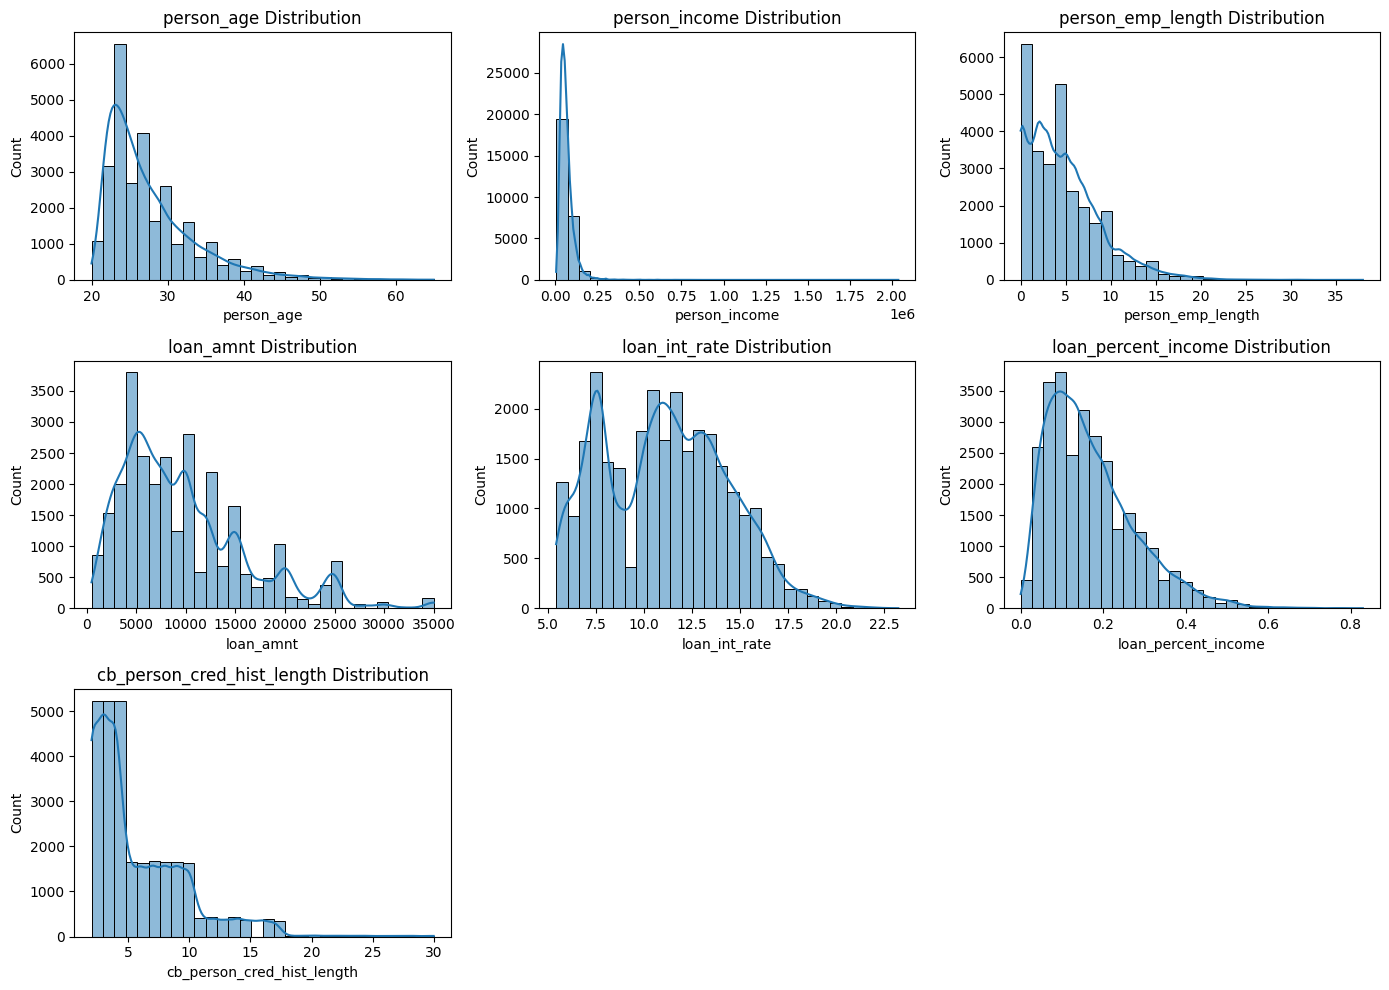

In [78]:
numeric_cols = [
    'person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length'
]

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

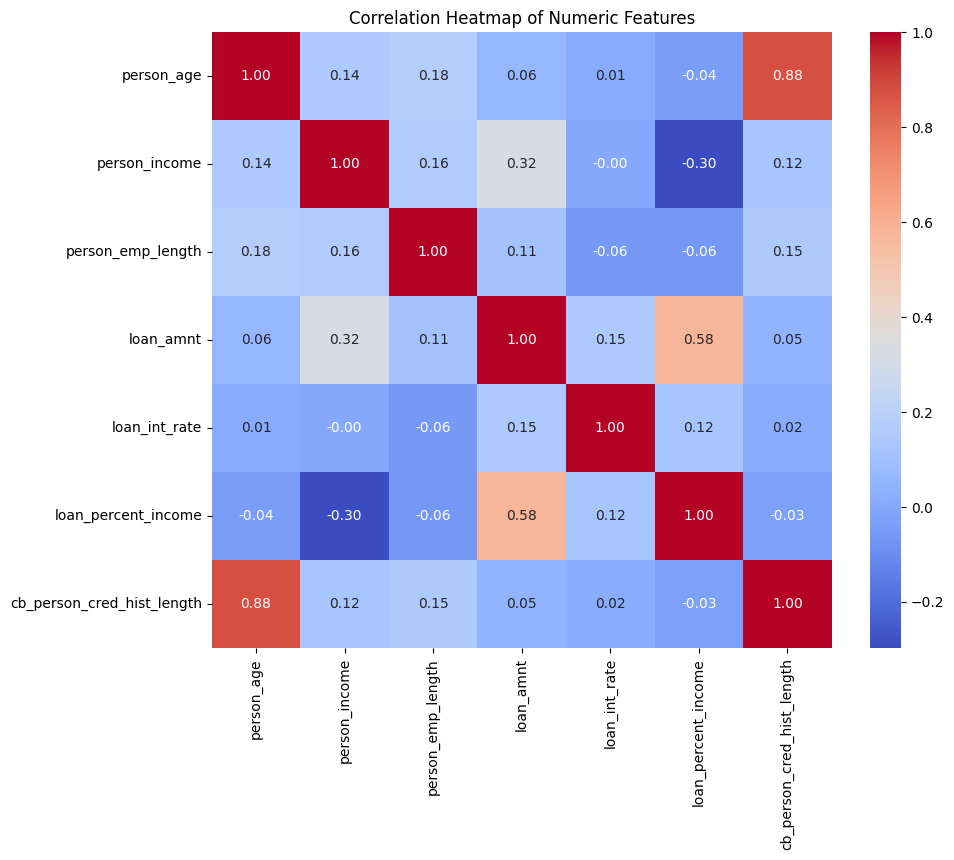

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

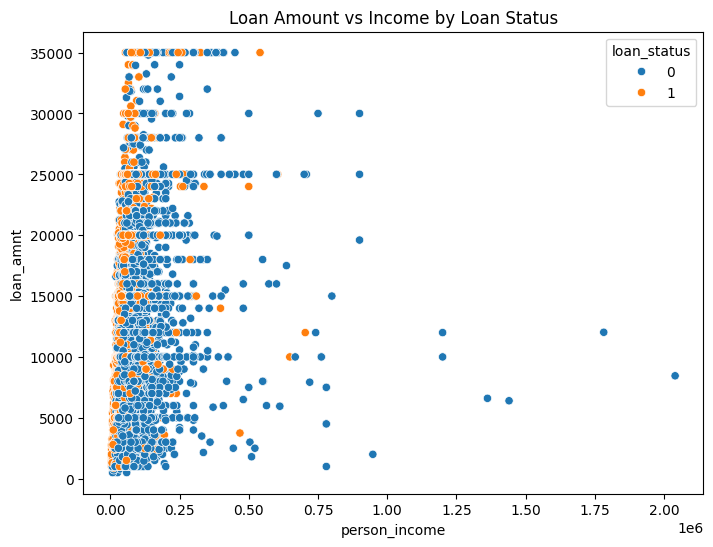

In [80]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=df)
plt.title('Loan Amount vs Income by Loan Status')
plt.show()

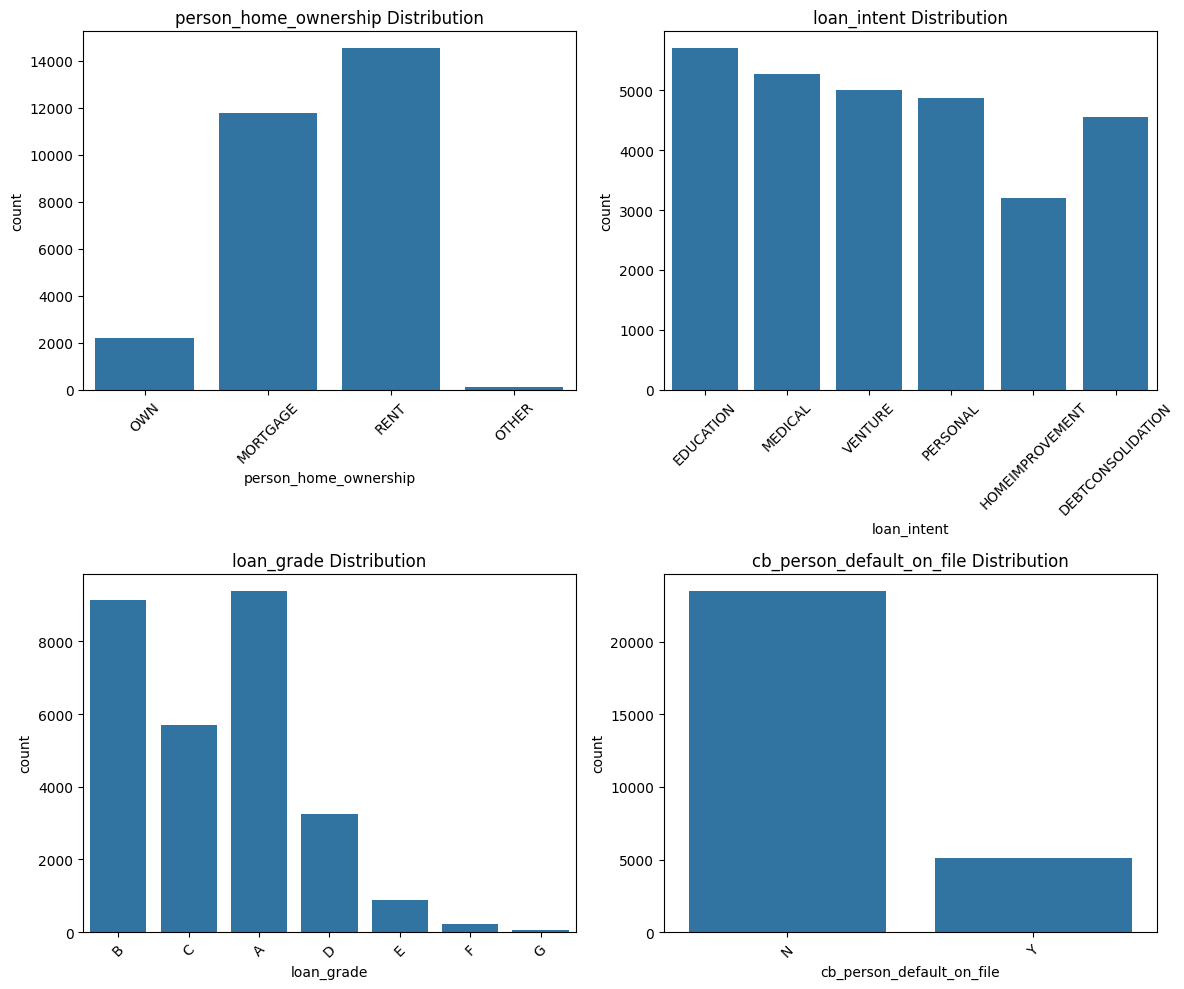

In [81]:
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col])
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# _____________________________________________________________________

In [82]:
# Define the features you want to keep
keep_features = [
    'person_age',
    'person_income',
    'person_home_ownership',
    'person_emp_length',
    'loan_intent',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_default_on_file',
    'cb_person_cred_hist_length'
]

# Keep only those columns (and their one-hot encoded variants)
df_encoded = df_encoded[[col for col in df_encoded.columns if any(feat in col for feat in keep_features)]]

In [83]:

# Numeric columns
numeric_cols = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


In [84]:
df_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
1,-1.104408,-1.102588,0.054932,-1.368046,0.030957,-0.653321,-0.944197,0,1,0,1,0,0,0,0,0
2,-0.442595,-1.102588,-0.938073,-0.656773,0.566710,3.765882,-0.694235,0,0,0,0,0,1,0,0,0
3,-0.773501,-0.017962,-0.193320,4.006020,1.297564,3.389780,-0.944197,0,0,1,0,0,1,0,0,0
4,-0.608048,-0.233334,0.799685,4.006020,1.000268,3.577831,-0.444273,0,0,1,0,0,1,0,0,1
5,-1.104408,-1.096767,-0.689822,-1.130955,-1.207779,0.757063,-0.944197,0,1,0,0,0,0,0,1,0


# _____________________________________________________________________

## K-Means Clustering 

In [85]:
X = df_encoded.copy()

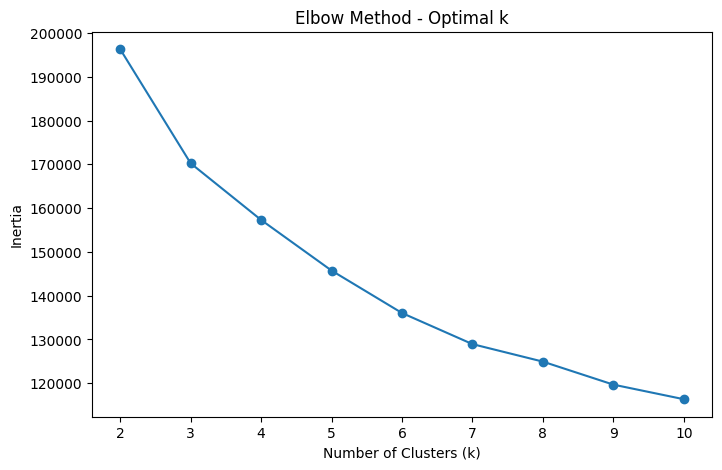

In [86]:
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [87]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(X)

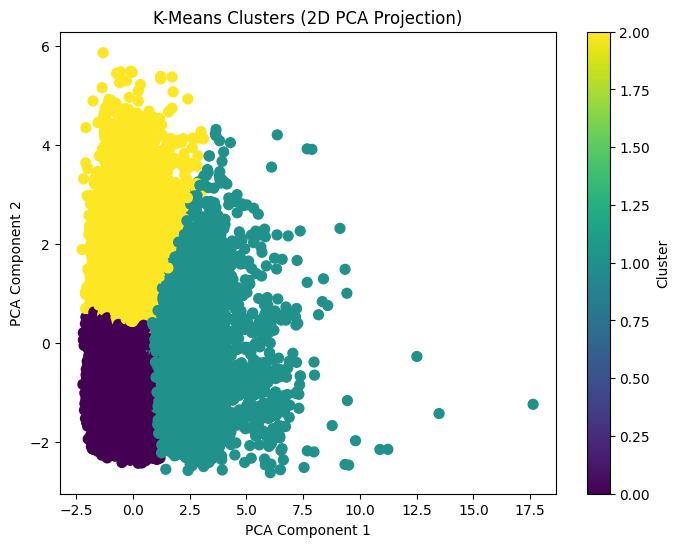

In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], c=df_encoded['cluster'], cmap='viridis', s=50)
plt.title('K-Means Clusters (2D PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [89]:
cluster_summary[numeric_cols].T.plot(kind='bar', figsize=(10,6))
plt.title('Average Feature Values by Cluster')
plt.ylabel('Standardized Value')
plt.show()

KeyError: "None of [Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',\n       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],\n      dtype='object', name='cluster')] are in the [columns]"

In [ ]:
cluster_summary = df_encoded.groupby('cluster').mean()
cluster_summary

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
cluster,,,,,,,,,,,,,,,,
0,-0.267116,-0.036961,-0.063861,1.029190,0.395983,1.097584,-0.263822,0.004919,0.080212,0.533737,0.200530,0.112625,0.181990,0.166225,0.178459,0.244545
1,1.647881,0.476475,0.711635,0.068252,-0.040060,-0.246130,1.635293,0.003371,0.085124,0.400337,0.151496,0.147282,0.182048,0.185630,0.180152,0.174041
2,-0.357906,-0.123528,-0.180185,-0.532470,-0.185115,-0.472864,-0.355796,0.002448,0.072298,0.527112,0.212878,0.100791,0.186457,0.167566,0.171332,0.146354


In [ ]:
import numpy as np

# Sort columns by feature category
cluster_summary = cluster_summary.T

# Display with fewer decimals
cluster_summary.round(2)

cluster,0,1,2
person_age,-0.27,1.65,-0.36
person_income,-0.04,0.48,-0.12
person_emp_length,-0.06,0.71,-0.18
loan_amnt,1.03,0.07,-0.53
loan_int_rate,0.40,-0.04,-0.19
loan_percent_income,1.10,-0.25,-0.47
cb_person_cred_hist_length,-0.26,1.64,-0.36
person_home_ownership_OTHER,0.00,0.00,0.00
person_home_ownership_OWN,0.08,0.09,0.07
person_home_ownership_RENT,0.53,0.40,0.53


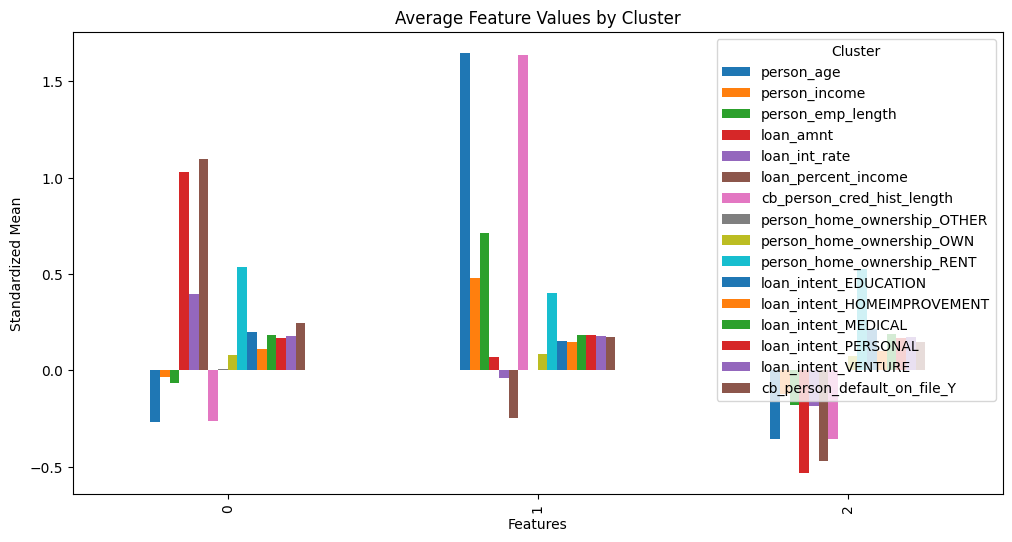

In [ ]:
cluster_summary.T.plot(kind='bar', figsize=(12,6))
plt.title('Average Feature Values by Cluster')
plt.ylabel('Standardized Mean')
plt.xlabel('Features')
plt.legend(title='Cluster')
plt.show()

In [ ]:
cluster_label_map = {0: 'Low risk', 1: 'Medium risk', 2: 'High risk'}
df_encoded['risk_label'] = df_encoded['cluster'].map(cluster_label_map)
df_encoded['risk_label'].value_counts()